[View in Colaboratory](https://colab.research.google.com/github/Nourahussein/Plant-seedling-classification/blob/master/FINAL_seedling.ipynb)

In [0]:
url = "https://storage.googleapis.com/kaggle-competitions-data/kaggle/7880/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1527464910&Signature=qM%2BYv4kQwpCfs6xfopj09oUA7SU1aFWKgaVG50UDgf6t0m90NOIkWyNFa1g7nVBSPWo0W72rsDOmtlQOZAiLea5K9qBhbLC8ztIlf4HvUWxawj%2FfUw4X%2FxYeUMDdDGRDHiNFMgGx3fRZjwSe7a81gskD5uhiEMeeOWChMaB5CdRZq34HSoa4an%2BrH8UE6hqPRc0RDFtAwxUwZZ9Ux%2Fu5Xhq3OwNcvjhByZzUgn7hSNNBU7mgRGyfTrhV%2FOA74A9LZMsdU67HZJ9kpQZGVjR1TusKjhmdHaIe6JpuWSTGA%2Br2ChhW4QMgsiO5k8MjcCMUwBHLiMb0v2A%2BLxsGP00kmQ%3D%3D"

In [2]:
from urllib import request
file_name = "train.zip"
request.urlretrieve(url, file_name)

('train.zip', <http.client.HTTPMessage at 0x7fa44faad908>)

In [3]:
!ls

datalab   drive		 seedling_data.zip  train.zip
data.zip  seedling_data  train		    zeft.zip


In [0]:
import zipfile as zf

In [6]:
train_zip = zf.ZipFile(file_name)
train_zip.extractall()
!ls

datalab   drive		 seedling_data.zip  train.zip
data.zip  seedling_data  train		    zeft.zip


In [0]:


import pandas as pd

In [25]:
!ls train/Black-grass

0050f38b3.png  355cad34c.png  6a19547c5.png  a26cb8017.png  d0ad9c78b.png
0183fdf68.png  37d85d833.png  6aabdeb45.png  a37d61200.png  d112c9c28.png
0260cffa8.png  39e9bf4c7.png  6afa7c717.png  a47cfeec4.png  d3c72d4c3.png
05eedce4d.png  3a8c485bc.png  6b9ebf8cc.png  a53088ca0.png  d3e69adad.png
075d004bc.png  3b7266ac3.png  6e027ec7d.png  a5f23b59f.png  d3ff1a639.png
078eae073.png  3b7d1fe82.png  6e193f1bb.png  a6f939a8b.png  d441eeda3.png
082314602.png  3dc08a0f7.png  7050b0b8a.png  a7d2b005e.png  d6036a0f4.png
0ace21089.png  3de7650a2.png  70bfa70ff.png  a87fd277c.png  d622ca3d2.png
0b228a6b8.png  3e9ef1999.png  71f6e3227.png  a8ab1ff26.png  d8afd58f3.png
0b3e7a7a9.png  3f268bcf8.png  72fd52505.png  a8cdae28a.png  da4f48653.png
0bb75ded8.png  3fb361e79.png  75ef53b3b.png  a8de8a80a.png  da5082ce2.png
0be707615.png  3ff68fa8a.png  765a69082.png  aa5bb06a1.png  daa7d4620.png
0c67c3fc3.png  40bf7be90.png  775735fb9.png  ab479d343.png  db337c4e7.png
0d1a9985f.png  418808d19.png  77629b9e

In [30]:
!pip install Image

In [0]:
#import Image
from PIL import Image

image = Image.open('Black-grass/69ad6773e.png')
image1 = Image.open('Black-grass/686132594.png')

here=image.convert('RGB').save("image_name.jpg","JPEG") #this converts png image as jpeg


In [40]:
!ls

datalab   drive		 seedling_data.zip  train.zip
data.zip  seedling_data  train		    zeft.zip


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

file_to_save = drive.CreateFile({'name': "train.zip"})
file_to_save.Upload()

In [47]:
file_to_save.get('id')

'19Xlwrzbl5da0PviQri73JETlgspvNyYp'

In [0]:
#import os 
#os.chdir("train")

In [62]:
!ls

Black-grass  Common-Chickweed  Loose-Silky-bent   Shepherds-Purse
Charlock     Common-wheat      Maize		  Small-flowered-Cranesbill
Cleavers     Fat-Hen	       Scentless-Mayweed  Sugar-beet


In [0]:
import numpy as np


In [0]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns

In [0]:
cwd = os.getcwd()


In [0]:
TRAin_DATA_FOLDER= cwd

In [0]:
images_per_class = {}
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    images_per_class[class_label] = []
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        images_per_class[class_label].append(image_bgr)

In [79]:
for key,value in images_per_class.items():
    print("{0} -> {1}".format(key, len(value)))

Charlock -> 390
Common-wheat -> 221
Small-flowered-Cranesbill -> 496
Fat-Hen -> 475
Maize -> 221
Cleavers -> 287
Black-grass -> 263
Common-Chickweed -> 611
Loose-Silky-bent -> 654
Shepherds-Purse -> 231
Scentless-Mayweed -> 516
Sugar-beet -> 385


In [0]:
def plot_for_class(label):
    nb_rows = 3
    nb_cols = 3
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images_per_class[label][n])
            n += 1     

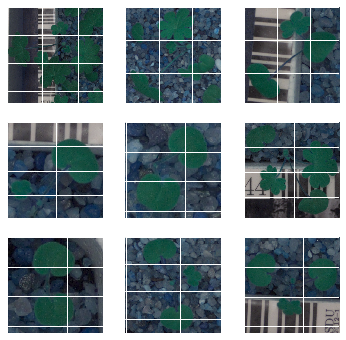

In [98]:
plot_for_class("Small-flowered-Cranesbill")